In [1]:
import xarray as xr
import cf_xarray as cfxr
import xesmf

In [2]:
sic_ds=xr.open_dataset('/g/data/gv90/P6_data/NSIDC/G02202_V4/seaice_conc_daily_sh_1978_v04r00.nc')

In [14]:
sic_ds.cf

Coordinates:
             CF Axes:   X: ['xgrid']
                        Y: ['ygrid']
                        T: ['time']
                        Z: n/a

      CF Coordinates:   time: ['time']
                        longitude, latitude, vertical: n/a

       Cell Measures:   area, volume: n/a

      Standard Names:   projection_x_coordinate: ['xgrid']
                        projection_y_coordinate: ['ygrid']
                        time: ['time']

              Bounds:   n/a

       Grid Mappings:   n/a

Data Variables:
       Cell Measures:   area, volume: n/a

      Standard Names:   interpolation_flag: ['spatial_interpolation_flag', 'temporal_interpolation_flag']
                        latitude: ['latitude']
                        longitude: ['longitude']
                        sea_ice_area_fraction: ['cdr_seaice_conc', 'nsidc_bt_seaice_conc', 'nsidc_nt_seaice_conc']
                        sea_ice_area_fraction status_flag: ['qa_of_cdr_seaice_conc']

              Bounds:   n

In [27]:
sic_ds.cf[['sea_ice_area_fraction']]

<xarray.Dataset>
Dimensions:                   (tdim: 68, y: 332, x: 316)
Coordinates:
    stdev_of_cdr_seaice_conc  (tdim, y, x) float32 ...
    qa_of_cdr_seaice_conc     (tdim, y, x) float32 ...
    time                      (tdim) datetime64[ns] 1978-10-25 ... 1978-12-31
    ygrid                     (y) float32 4.338e+06 4.312e+06 ... -3.938e+06
    xgrid                     (x) float32 -3.938e+06 -3.912e+06 ... 3.938e+06
    projection                |S1 b''
Dimensions without coordinates: tdim, y, x
Data variables:
    cdr_seaice_conc           (tdim, y, x) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    nsidc_nt_seaice_conc      (tdim, y, x) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    nsidc_bt_seaice_conc      (tdim, y, x) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes: (12/39)
    Conventions:               CF-1.6, ACDD-1.3
    title:                     NOAA/NSIDC Climate Data Record of Passive Micr...
    references:                Comiso, J. C., and F. Nishio. 2008. Trends in ...
    comment:                   none
    program:                   NOAA Climate Data Record Program
    cdr_variable:              cdr_seaice_conc
    ...                        ...
    acknowledgment:            This project was supported in part by a grant ...
    platform:                  NIMBUS-7
    sensor:                    SMMR > Scanning Multichannel Microwave Radiometer
    date_created:              2021-06-21T21:22:35Z
    time_coverage_start:       1978-10-25T00:00:00Z
    time_coverage_end:         1978-12-31T23:59:59Z

In [32]:
sic_ds.mean('y')

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('S1'), dtype('S1')) -> None

In [14]:
sps_ds=xr.open_dataset('/g/data/gv90/P6_data/NSIDC/G02202-cdr-ancillary-nh.nc')

In [15]:
sps_ds=sps_ds.drop(['x','y'])

In [16]:
ds_out = xesmf.util.grid_global(1, 1)
ds_out = ds_out.drop({'lon_b', 'lat_b'})

# let's shift our longitude grid so that it spans [-280, 80] instead [-180, 180]
# this is just for plotting purposes so that the seam is in the Indian Ocean
# rather than in the middle of the Pacific Ocean
ds_out = ds_out.assign_coords({'lon': ds_out.lon - 100.})

ds_out = ds_out.rename({'lon': 'longitude', 'lat': 'latitude'})
ds_out


<xarray.Dataset>
Dimensions:    (y: 180, x: 360)
Coordinates:
    longitude  (y, x) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
    latitude   (y, x) float64 -89.5 -89.5 -89.5 -89.5 ... 89.5 89.5 89.5 89.5
Dimensions without coordinates: y, x
Data variables:
    *empty*

In [17]:
%%time

regridder_1degACCESSOM2_1deg = xesmf.Regridder(sps_ds, ds_out, 'bilinear', periodic=True,
                                               filename="bilinear_tracer_weights_in1degACCESSOM2_out1deg.nc")
regridder_1degACCESSOM2_1deg

CPU times: user 4.24 s, sys: 50.3 ms, total: 4.29 s
Wall time: 4.3 s


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_tracer_weights_in1degACCESSOM2_out1deg.nc 
Reuse pre-computed weights? False 
Input grid shape:           (448, 304) 
Output grid shape:          (180, 360) 
Periodic in longitude?      True

In [2]:
shm_cdr=xr.open_dataset(
    'https://polarwatch.noaa.gov/erddap/griddap/nsidcG02202v4shmday'
)

In [6]:
shm_cdr

<xarray.Dataset>
Dimensions:                           (time: 536, ygrid: 332, xgrid: 316)
Coordinates:
  * time                              (time) datetime64[ns] 1978-11-01 ... 20...
  * ygrid                             (ygrid) float32 4.338e+06 ... -3.938e+06
  * xgrid                             (xgrid) float32 -3.938e+06 ... 3.938e+06
Data variables:
    cdr_seaice_conc_monthly           (time, ygrid, xgrid) float32 0.0 ... 0.0
    nsidc_bt_seaice_conc_monthly      (time, ygrid, xgrid) float32 ...
    nsidc_nt_seaice_conc_monthly      (time, ygrid, xgrid) float32 ...
    qa_of_cdr_seaice_conc_monthly     (time, ygrid, xgrid) float32 ...
    stdev_of_cdr_seaice_conc_monthly  (time, ygrid, xgrid) float32 ...
Attributes: (12/66)
    _NCProperties:                                       version=2,netcdf=4.8...
    acknowledgement:                                     This project was sup...
    cdm_data_type:                                       Grid
    cdr_variable:                                        cdr_seaice_conc_monthly
    contributor_name:                                    Walter N. Meier, Flo...
    contributor_role:                                    principal investigat...
    ...                                                  ...
    summary:                                             This data set provid...
    time_coverage_duration:                              P1M
    time_coverage_end:                                   2023-06-01T00:00:00Z
    time_coverage_resolution:                            P1M
    time_coverage_start:                                 1978-11-01T00:00:00Z
    title:                                               Sea Ice Concentratio...

In [4]:
cdr_monthly=shm_cdr.cdr_seaice_conc_monthly
cdr_monthly=cdr_monthly.where(cdr_monthly<=1)

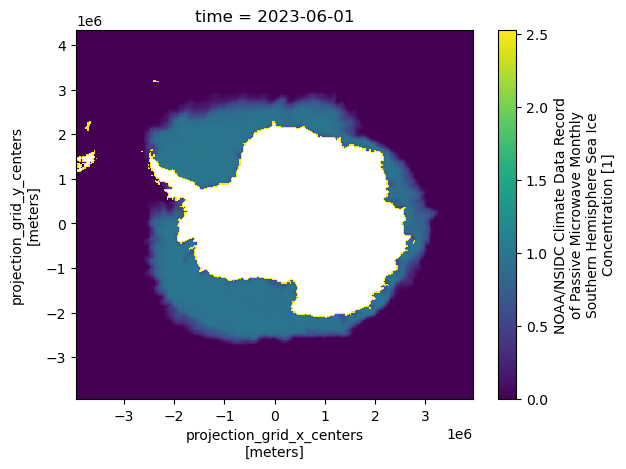

In [5]:
shm_cdr.cdr_seaice_conc_monthly.sel(time='2023-06').plot()